# CP 322 - Final Project

Aditya Chauhan (169027493)

## Introduction

### Dataset Choice

- [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Business Understanding

Key Research Questions:

- What are the most significant factors influencing students' final grades (G3)
- How does early academic performance (G1 & G2) correlate with final outcomes (G3)
- Can external factors such as familial support, alcohol consumption, and absences, predict student's academic success?

### Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from scipy.stats import zscore

### Read/Load Data

In [26]:
# Load the datasets
student_mat = pd.read_csv("Data/student-mat.csv", sep=";")
student_por = pd.read_csv("Data/student-por.csv", sep=";")

# Merge datasets on specified columns
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus", 
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]
merged_data = pd.merge(student_mat, student_por, on=merge_columns, suffixes=('_mat', '_por'))

# Save the merged dataset
merged_data.to_csv("student-merged.csv", index=False)
print("Number of students in merged dataset:", merged_data.shape[0])
print("Merged dataset saved to 'student-merged.csv'.")

continuous_features = merged_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = merged_data.select_dtypes(include=['object']).columns

Number of students in merged dataset: 382
Merged dataset saved to 'student-merged.csv'.


## Data Quality Report

### Objective & Use Case

Student success is a cornerstone of educational systems, and identifying the drivers of academic performance is critical for improving outcomes. This project utilizes the Student Performance Dataset to develop a predictive model that analyzes the factors affecting final grades (G3). By addressing key questions—like the importance of early grades (G1, G2), the role of family support, and the impact of behavioral factors—this model provides practical tools for educators and administrators to allocate resources effectively and support at-risk students.

### Tabular Summary

In [27]:
def generate_tabular_summary(df):
    """
    Generate a tabular summary for the dataset with key statistics.
    
    Parameters:
    - df: pandas DataFrame, the dataset to summarize.
    
    Returns:
    - summary: pandas DataFrame with feature-wise statistics.
    """
    summary = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Number of Unique Values": df.nunique().values,
        "Number of Missing Values": df.isnull().sum().values,
        "Percentage of Missing Values (%)": (df.isnull().sum() / len(df) * 100).values,
        "Mean": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Median": [df[col].median() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Standard Deviation": [df[col].std() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Minimum": [df[col].min() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Maximum": [df[col].max() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Top Value (Mode)": [df[col].mode()[0] if not df[col].mode().empty else None for col in df.columns],
        "Frequency of Top Value": [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None for col in df.columns]
    })
    return summary

# Generate the tabular summary
tabular_summary = generate_tabular_summary(merged_data)

# Save the summary to a CSV file
tabular_summary.to_csv("tabular_summary.csv", index=False)
print("Tabular summary saved to 'tabular_summary.csv'.")

# Display the summary
tabular_summary

Tabular summary saved to 'tabular_summary.csv'.


,Column Name,Data Type,Number of Unique Values,Number of Missing Values,Percentage of Missing Values (%),Mean,Median,Standard Deviation,Minimum,Maximum,Top Value (Mode),Frequency of Top Value
0,school,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,GP,342
1,sex,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,F,198
2,age,int64,7,0,0.0,16.586387,17.0,1.173470,15.0,22.0,16,107
3,address,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,U,301
4,famsize,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,GT3,278
5,Pstatus,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,T,344
6,Medu,int64,5,0,0.0,2.806283,3.0,1.086381,0.0,4.0,4,135
7,Fedu,int64,5,0,0.0,2.565445,3.0,1.096240,0.0,4.0,2,105
8,Mjob,object,5,0,0.0,NaN,NaN,NaN,NaN,NaN,other,138
9,Fjob,object,5,0,0.0,NaN,NaN,NaN,NaN,NaN,other,211


### Advanced Data Quality Report


### Advanced Feature Insights ###

Correlation Matrix:


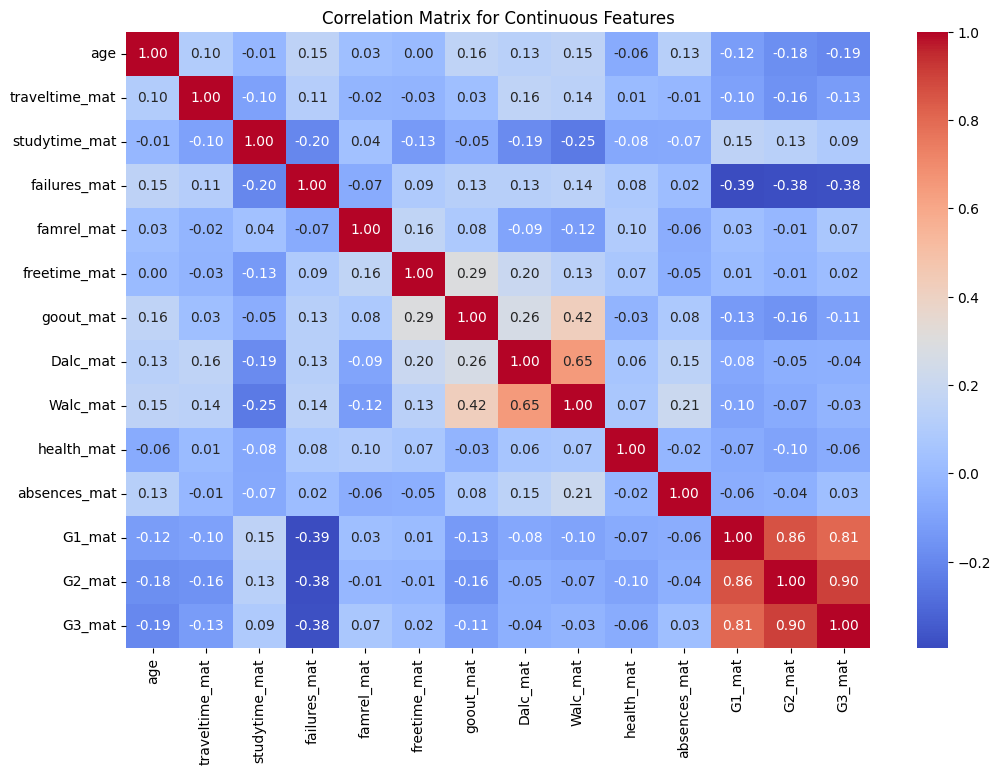


Scatter Plot Matrix:


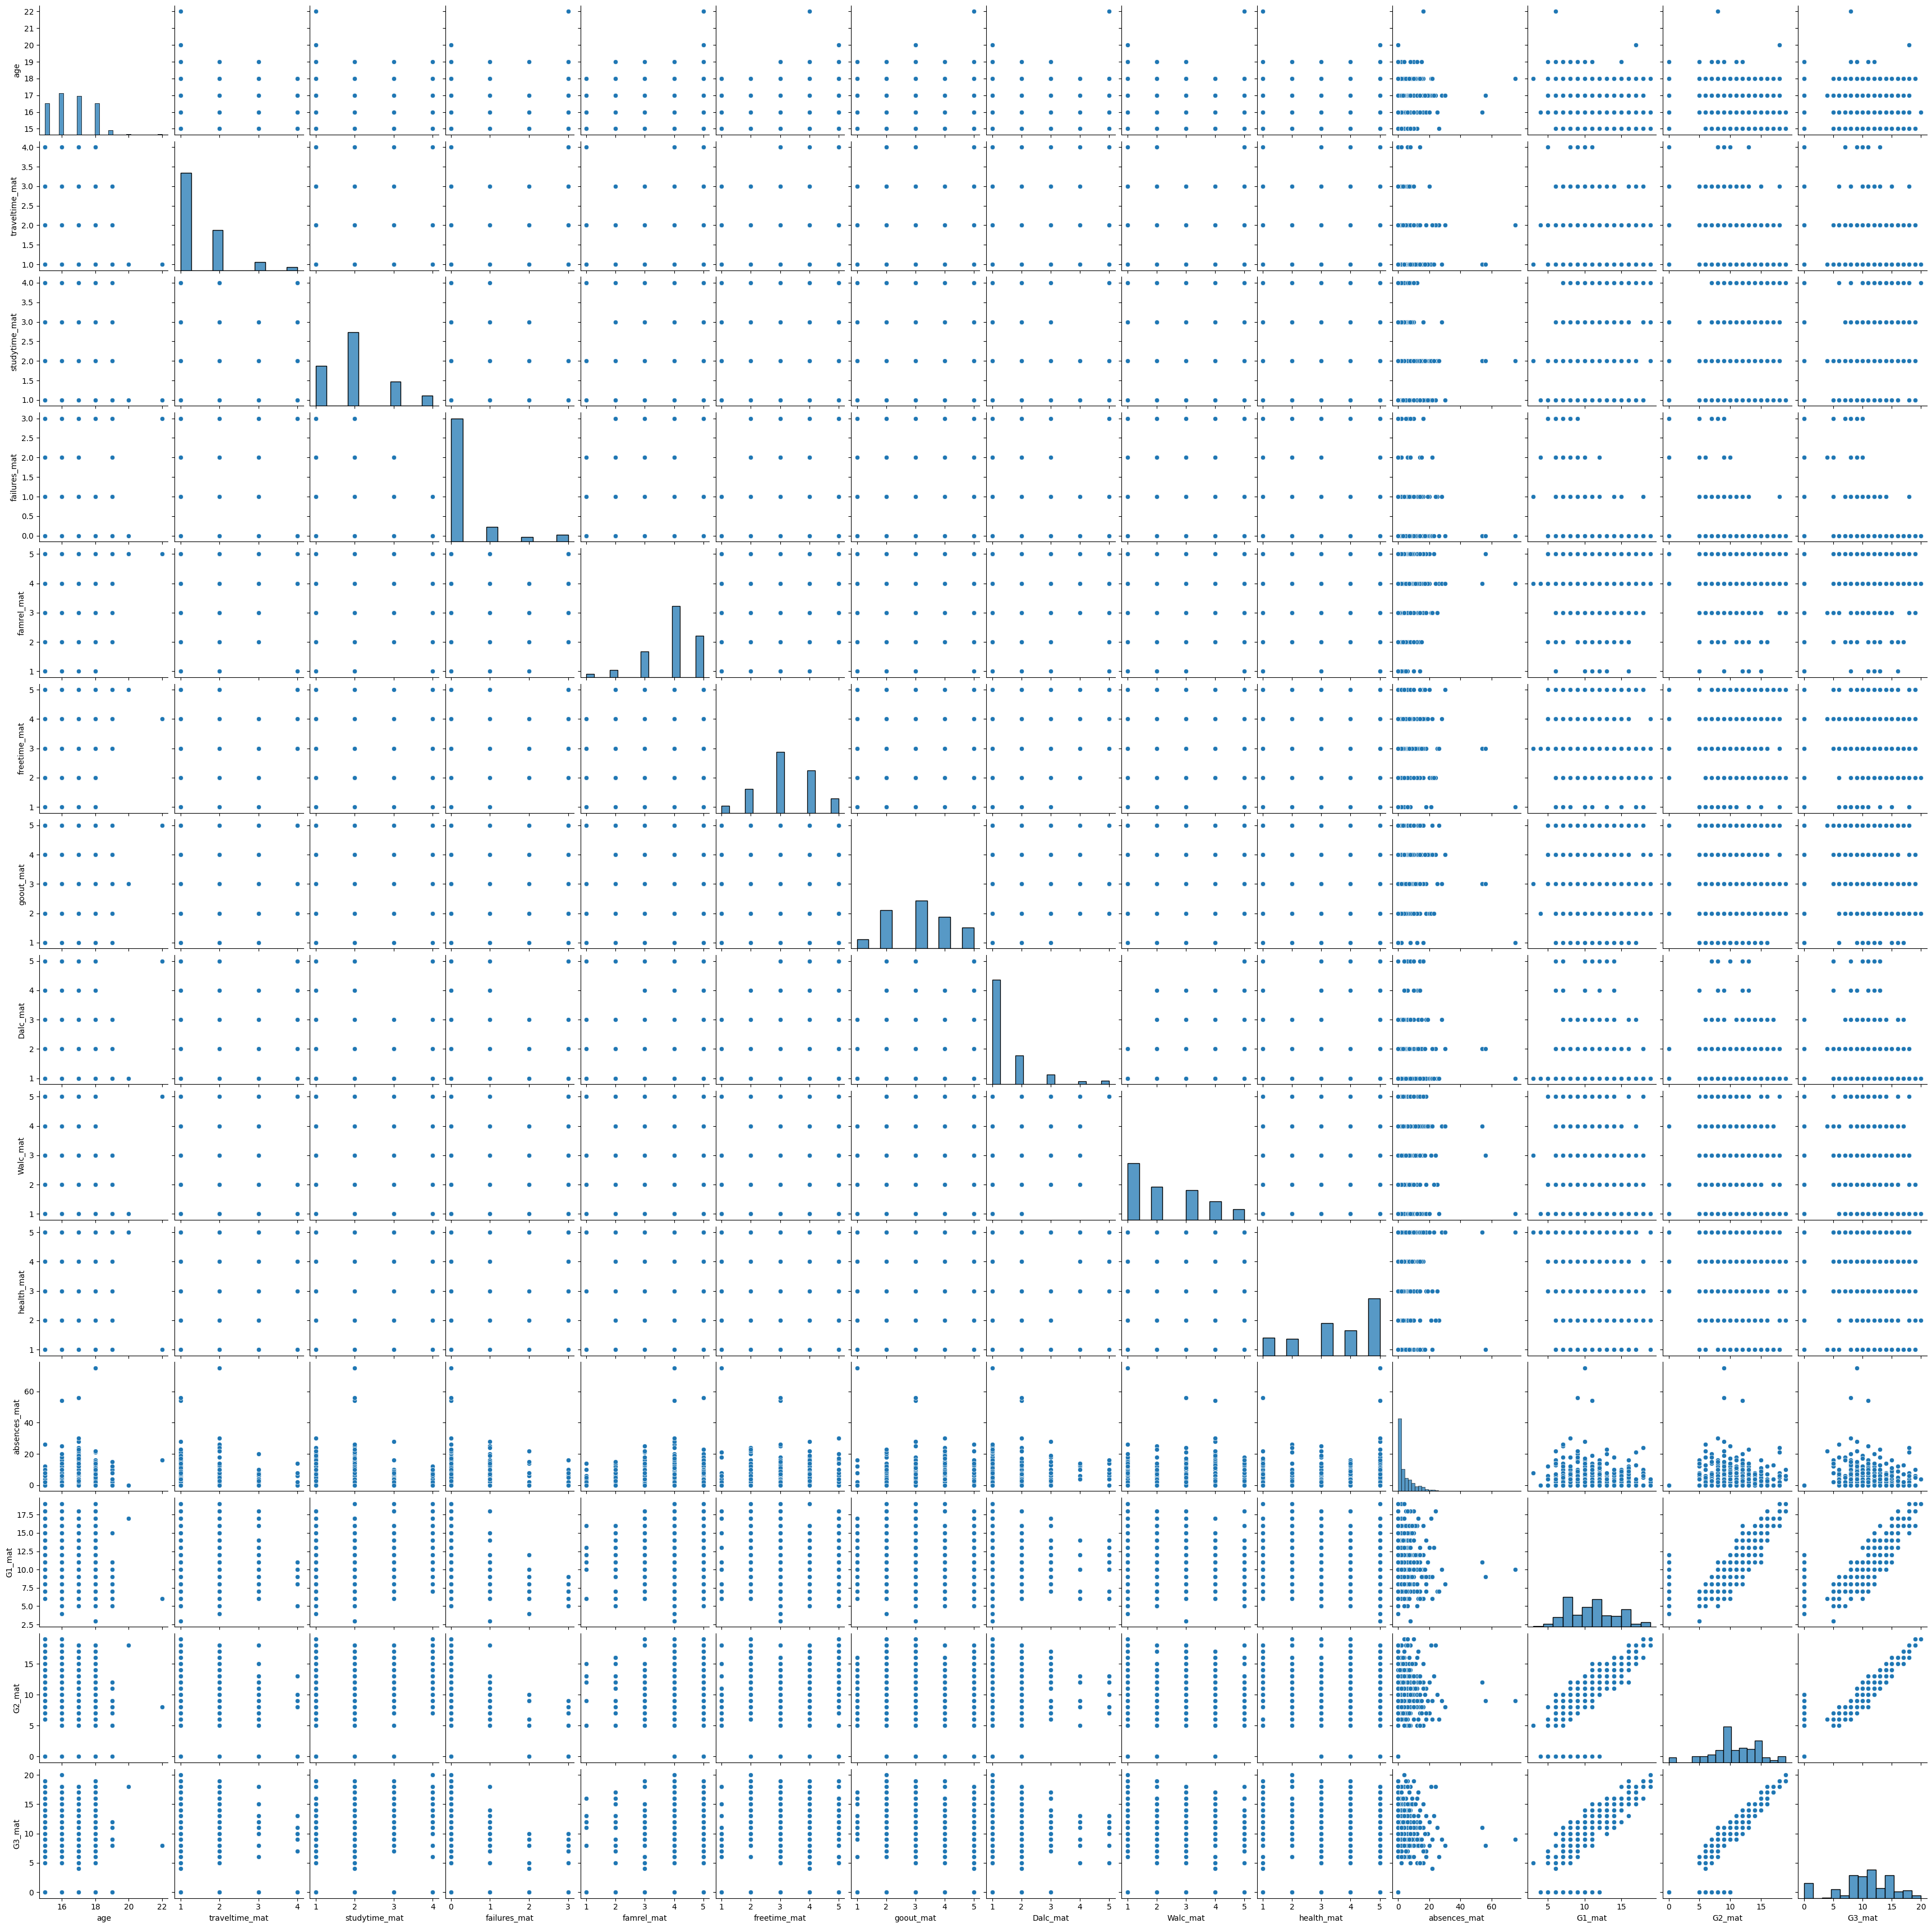


### Data Transformations ###
Normalizing continuous features...
        age  traveltime_mat  studytime_mat  failures_mat  famrel_mat  \
0  1.206223        0.802905      -0.040289     -0.398855    0.065416   
1  0.352932       -0.637047      -0.040289     -0.398855    1.151884   
2 -1.353650       -0.637047      -0.040289      3.719054    0.065416   
3 -1.353650       -0.637047       1.143577     -0.398855   -1.021053   
4 -0.500359       -0.637047      -0.040289     -0.398855    0.065416   

   freetime_mat  goout_mat  Dalc_mat  Walc_mat  health_mat  absences_mat  \
0     -0.225458   0.785031 -0.535351 -0.999156   -0.413674      0.089377   
1     -0.225458  -0.099576 -0.535351 -0.999156   -0.413674     -0.173254   
2     -0.225458  -0.984184  0.594505  0.561898   -0.413674      0.614638   
3     -1.238692  -0.984184 -0.535351 -0.999156    1.016403     -0.435884   
4     -0.225458  -0.984184 -0.535351 -0.218629    1.016403     -0.173254   

     G1_mat    G2_mat    G3_mat  
0 -1.752359

In [28]:
def advanced_data_quality_report(df, continuous_features, categorical_features, target_feature):
    """
    Advanced Data Quality Report that includes:
    - Advanced Feature Insights
    - Data Transformations
    - Reliability Analysis
    - Feature Importance Testing
    - ABT Validation
    """
    report = {}

    ### 1. Advanced Feature Insights
    print("\n### Advanced Feature Insights ###")
    
    # Correlation Matrix for Continuous Features
    print("\nCorrelation Matrix:")
    correlation_matrix = df[continuous_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix for Continuous Features")
    plt.show()
    report["correlation_matrix"] = correlation_matrix

    # SPLOM (Scatter Plot Matrix)
    print("\nScatter Plot Matrix:")
    sns.pairplot(df[continuous_features])
    plt.show()

    ### 2. Data Transformations
    print("\n### Data Transformations ###")
    
    # Normalize Continuous Features
    print("Normalizing continuous features...")
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df[continuous_features])
    normalized_df = pd.DataFrame(normalized_data, columns=continuous_features)
    print(normalized_df.head())

    # Binning Example: Age
    print("Binning age into categories...")
    df["age_binned"] = pd.cut(df["age"], bins=[0, 15, 18, 22], labels=["Child", "Teen", "Adult"])
    print(df["age_binned"].value_counts())

    ### 3. Reliability Analysis
    print("\n### Reliability Analysis ###")
    
    # Skewness and Kurtosis
    skewness = df[continuous_features].skew()
    kurtosis = df[continuous_features].kurt()
    print("Skewness:\n", skewness)
    print("Kurtosis:\n", kurtosis)

    # Outlier Detection (Z-score)
    z_scores = np.abs((df[continuous_features] - df[continuous_features].mean()) / df[continuous_features].std())
    outlier_counts = (z_scores > 3).sum()
    print("Outlier Counts:\n", outlier_counts)

    ### 4. Feature Importance Testing
    print("\n### Feature Importance Testing ###")
    
    # Mutual Information for Categorical Features
    encoded_df = df.copy()
    for feature in categorical_features:
        if feature in encoded_df.columns:
            encoded_df[feature] = LabelEncoder().fit_transform(encoded_df[feature].astype(str))
    mi_scores = mutual_info_classif(
        encoded_df[categorical_features],
        encoded_df[target_feature],
        discrete_features=True
    )
    mi_scores_df = pd.DataFrame({
        "Feature": categorical_features,
        "Mutual Information Score": mi_scores
    }).sort_values(by="Mutual Information Score", ascending=False)
    print(mi_scores_df)

    ### 5. ABT Validation
    print("\n### ABT Validation ###")
    print("Justifying the dataset as an ABT:")
    print("1. Data is complete with no missing values.")
    print("2. Derived features like failure_study_ratio add meaningful insights.")
    print("3. Consistent transformations enhance model training.")

    return report

# Example usage
continuous_features = [
    "age", "traveltime_mat", "studytime_mat", "failures_mat", 
    "famrel_mat", "freetime_mat", "goout_mat", "Dalc_mat", 
    "Walc_mat", "health_mat", "absences_mat", "G1_mat", "G2_mat", "G3_mat"
]

categorical_features = [
    "school", "sex", "address", "famsize", "Pstatus", 
    "Mjob", "Fjob", "reason", "guardian_mat", 
    "schoolsup_mat", "famsup_mat", "paid_mat", "activities_mat", 
    "nursery", "higher_mat", "internet", "romantic_mat"
]

target_feature = "G3_mat"

# Generate report
advanced_report = advanced_data_quality_report(
    df=merged_data,
    continuous_features=continuous_features,
    categorical_features=categorical_features,
    target_feature=target_feature
)


### Visualizations

### Data Cleaning

### Data Normalization

## Experimental Design

## Modelling

## Evaluation & Deployment